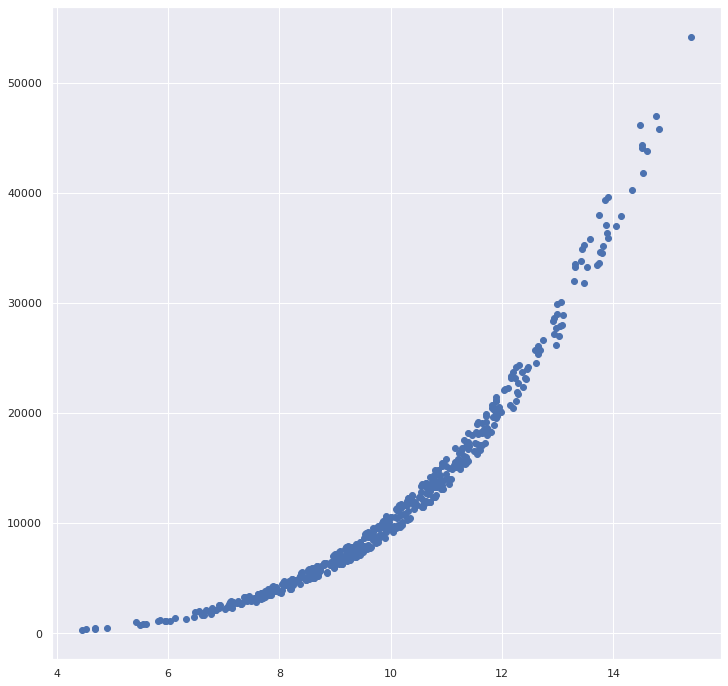

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
plt.rcParams["figure.figsize"] = [12,12]

#plt.figure(figsize=(12,12))


np.random.seed(0)
#jeu de données sous la forme y = f(x)  avec f(x) = x^4 + bx^3 + c (-1<b<1 et 0<c<1)
x = np.random.normal(10, 2, 500)
y = x ** 4 + np.random.uniform(-1, 1,500)*(x ** 3) + np.random.uniform(0, 1,500)

plt.scatter(x,y)
plt.show()

In [ ]:
x = x[:, np.newaxis]
y = y[:, np.newaxis]

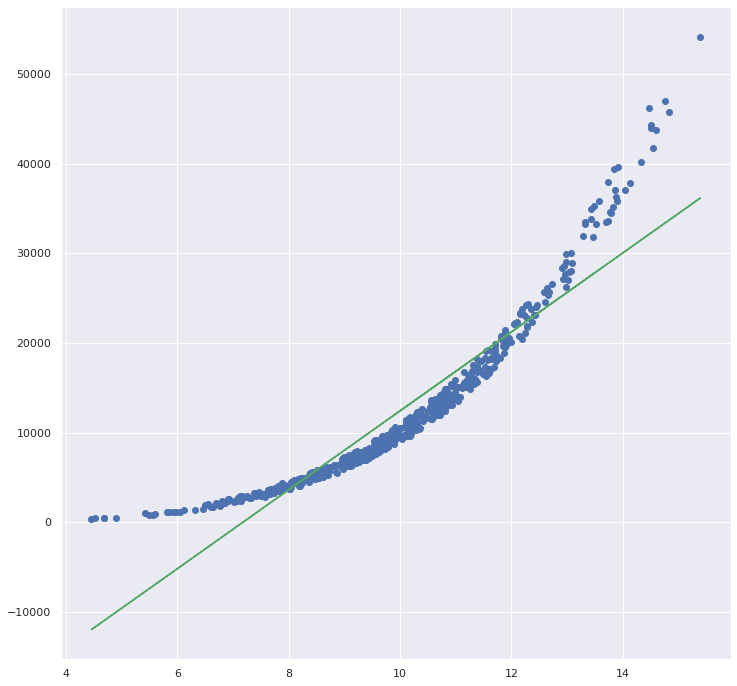

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


model.fit(x,y)
y_predict = model.predict(x)

plt.scatter(x, y)
plt.plot(x, y_predict, color='g')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

In [ ]:
r2 = r2_score(y,y_predict)
print("r2_score = ",r2)

r2_score =  0.8729881017018355


In [ ]:
RMSE =sqrt(mean_squared_error(y, y_predict))
print("mean_squered_error = ",RMSE)

mean_squered_error =  3351.4474125622496


## regresion polynomiale
la régression polynomiale est une forme d' analyse de régression dans laquelle la relation entre la variable explicative et la variable expliquée est modélisée comme un polynôme.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features= PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print("r2_score = ",r2)
print("mean_squered_error = ",rmse)

r2_score =  0.9938759791540012
mean_squered_error =  735.9164925748689


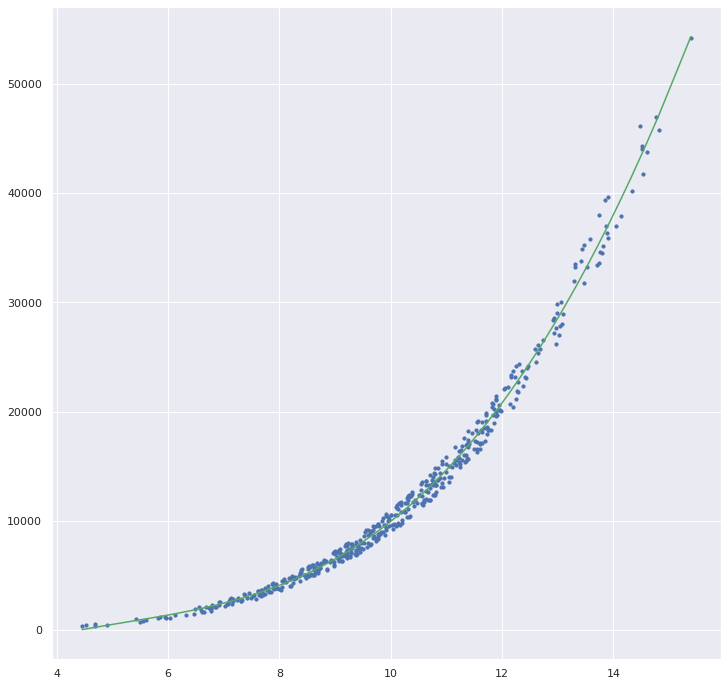

In [ ]:
import operator
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x_p, y_poly_pred_P = zip(*sorted_zip)
plt.plot(x_p, y_poly_pred_P, color='g')
plt.show()

## comment se fait le choix du degré du polynôme dans la régression polynomiale ?

In [ ]:
from sklearn.metrics import r2_score
def degreeChoice (x,y,degree):
    polynomial_features= PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)
    rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
    r2 = r2_score(y,y_poly_pred)
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
    x_p, y_poly_pred_P = zip(*sorted_zip)
    return rmse,r2, x_p, y_poly_pred_P

In [ ]:
rmselist = np.zeros(100)
r2list = np.zeros(100)
x_p_list = [None]*100
y_poly_pred_P_list=[None]*100
for i in np.arange(1, 101):
    rmselist[i-1],r2list[i-1] ,x_p_list[i-1],y_poly_pred_P_list[i-1]= degreeChoice (x,y,i)

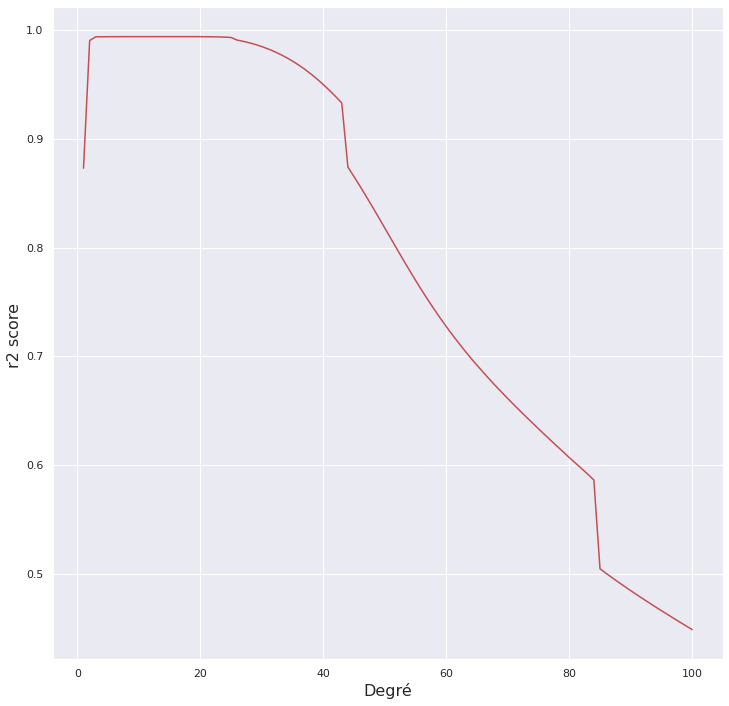

In [ ]:
plt.plot(np.arange(1, 101), r2list, color='r')
plt.xlabel('Degré', fontsize=16)
plt.ylabel('r2 score ', fontsize=16)
plt.show()

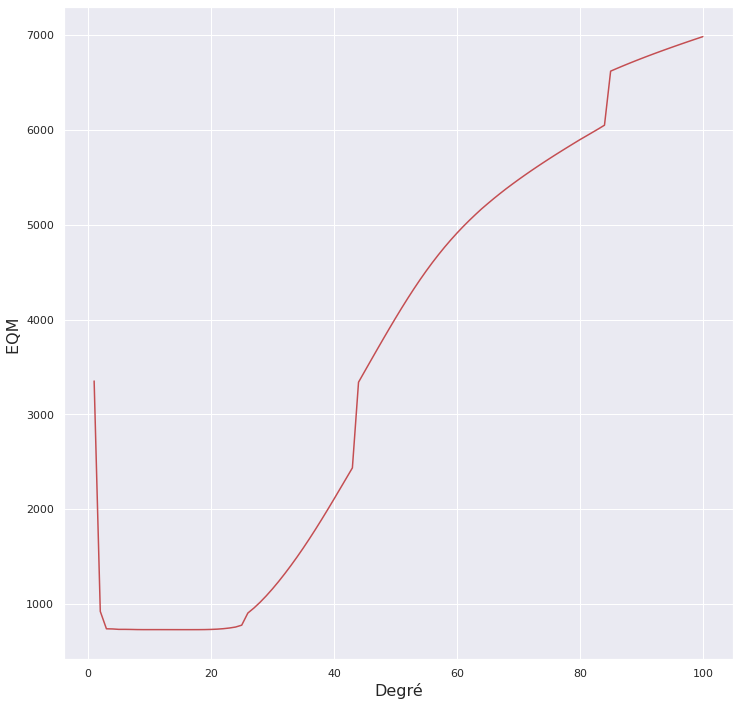

In [ ]:
plt.plot(np.arange(1, 101), rmselist, color='r')
plt.xlabel('Degré', fontsize=16)
plt.ylabel('EQM ', fontsize=16)
plt.show()

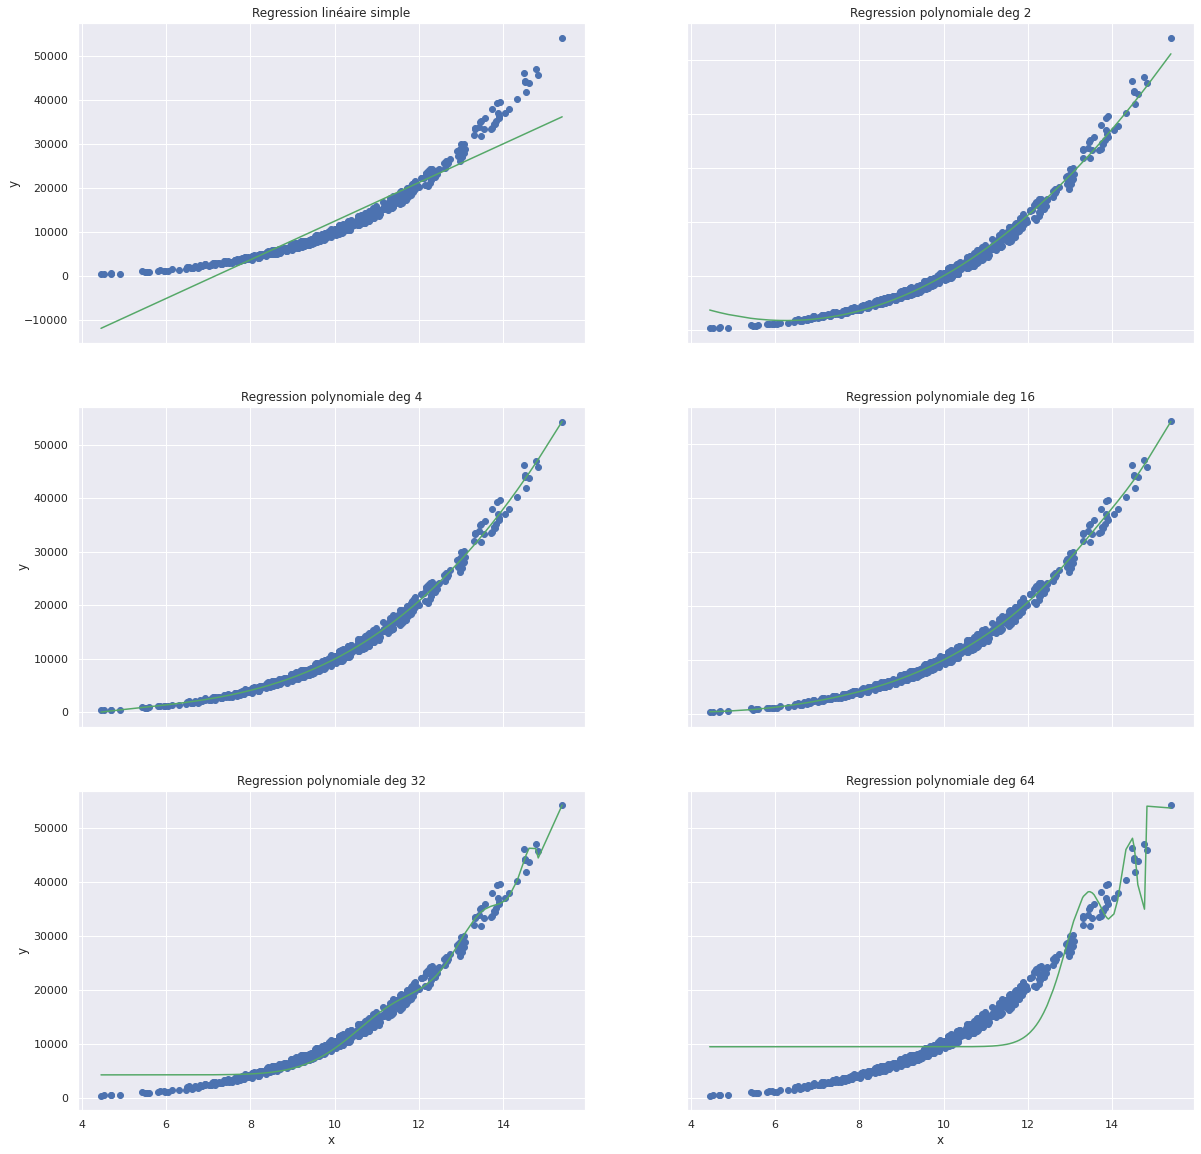

In [ ]:
fig, axs = plt.subplots(3, 2,figsize=(20,20))
 
 
axs[0, 0].scatter(x, y)
axs[0, 0].plot(x_p_list[0],y_poly_pred_P_list[0],color='g')
axs[0, 0].set_title('Regression linéaire simple')
 
#degre 2
axs[0, 1].scatter(x, y)
axs[0, 1].plot(x_p_list[1],y_poly_pred_P_list[1],color='g')
axs[0, 1].set_title('Regression polynomiale deg 2')
 
 
#degre 4
axs[1, 0].scatter(x, y)
axs[1, 0].plot(x_p_list[3],y_poly_pred_P_list[3],color='g')
axs[1, 0].set_title('Regression polynomiale deg 4')
 
 
#degre 16
axs[1, 1].scatter(x, y)
axs[1, 1].plot(x_p_list[15],y_poly_pred_P_list[15],color='g')
axs[1, 1].set_title('Regression polynomiale deg 16')
 
#degre 32
axs[2, 0].scatter(x, y)
axs[2, 0].plot(x_p_list[31],y_poly_pred_P_list[31],color='g')
axs[2, 0].set_title('Regression polynomiale deg 32')
 
#degre 64
axs[2, 1].scatter(x, y)
axs[2, 1].plot(x_p_list[63],y_poly_pred_P_list[63],color='g')
axs[2, 1].set_title('Regression polynomiale deg 64')
for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')
 
for ax in axs.flat:
    ax.label_outer()

In [ ]:
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score
donnees_boston = load_boston()

In [ ]:
#Transformation de notre jeu de données en Data Frame grace à pandas
donnees_boston_df = pd.DataFrame(donnees_boston.data, columns=donnees_boston.feature_names)
#on créé une nouvelle colonne qui est PRIX. ce qui equivaut à MEDV du jeu de données
donnees_boston_df['PRIX'] = donnees_boston.target

In [ ]:
#on utilise seulement 4 variables explicatives
X=pd.DataFrame(np.c_[donnees_boston_df['LSTAT'],donnees_boston_df['RM'],donnees_boston_df['TAX'],donnees_boston_df['PTRATIO']], columns = ['LSTAT','RM','TAX','PTRATIO'])
Y = donnees_boston_df['PRIX']
 
#base d'apprentissage et base de test
from sklearn.model_selection import train_test_split
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 4)
(102, 4)
(404,)
(102,)


In [ ]:
def evalPolynonmialRegression(degree):
    #entrainement du modèle
    polynomial_features= PolynomialFeatures(degree=degree)
    X_train_poly = polynomial_features.fit_transform(X_train)
    X_test_poly = polynomial_features.fit_transform(X_test)
    model = LinearRegression()
    model.fit(X_train_poly, Y_train)
    # Evaluation du training set

    y_train_predict = model.predict(X_train_poly)
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
    r2 = r2_score(Y_train, y_train_predict)

    print('La performance du modèle sur la base dapprentissage')
    print('--------------------------------------')
    print('Lerreur quadratique moyenne est {}'.format(rmse))
    print('le score R2 est {}'.format(r2))
    print('\n')

    # Evaluation du testing set
    y_test_predict = model.predict(X_test_poly)
    rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
    r2 = r2_score(Y_test, y_test_predict)

    print('La performance du modèle sur la base de test')
    print('--------------------------------------')
    print('Lerreur quadratique moyenne est {}'.format(rmse))
    print('le score R2 est {}'.format(r2))
    return model,r2 ,rmse

In [ ]:
evalPolynonmialRegression(4)

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 2.90959381948064
le score R2 est 0.9014485576630819


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 3.4562195486602763
le score R2 est 0.8474279817024983


(LinearRegression(), 0.8474279817024983, 3.4562195486602763)